**In a college, botany sir has given a task to the students to classify the flowers using sepal and petal features. The student has measured length and width of sepal and petal. He has recorded the values in centimeters and trying to apply unsupervised machine learning methods.**

**Dataset URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data**

**In order to complete the task, he has to do the following set of operations:**

**a)	Open the dataset and display top 5 rows. (5 marks)**

In [1]:
import warnings

warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
from scipy.cluster.hierarchy import cophenet, cut_tree, dendrogram, linkage
from scipy.spatial.distance import cdist, pdist
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

In [2]:
colnames = [
    "sepal length in cm",
    "sepal width in cm",
    "petal length in cm",
    "petal width in cm",
    "class",
]
data = pd.read_csv(
    "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data",
    names=colnames,
)

In [3]:
data.head(5)

sepal length in cm  sepal width in cm  petal length in cm  \
0                 5.1                3.5                 1.4   
1                 4.9                3.0                 1.4   
2                 4.7                3.2                 1.3   
3                 4.6                3.1                 1.5   
4                 5.0                3.6                 1.4   

   petal width in cm        class  
0                0.2  Iris-setosa  
1                0.2  Iris-setosa  
2                0.2  Iris-setosa  
3                0.2  Iris-setosa  
4                0.2  Iris-setosa

**b)	Normalize the values of sepal and petal features. (5 marks)**

In [4]:
X = data.iloc[:, [0, 1, 2, 3]].values
y = data.iloc[:, 4].values

In [5]:
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

**c)	Apply hierarchy clustering methods single, complete, average, centroid and wards. (10 marks)**

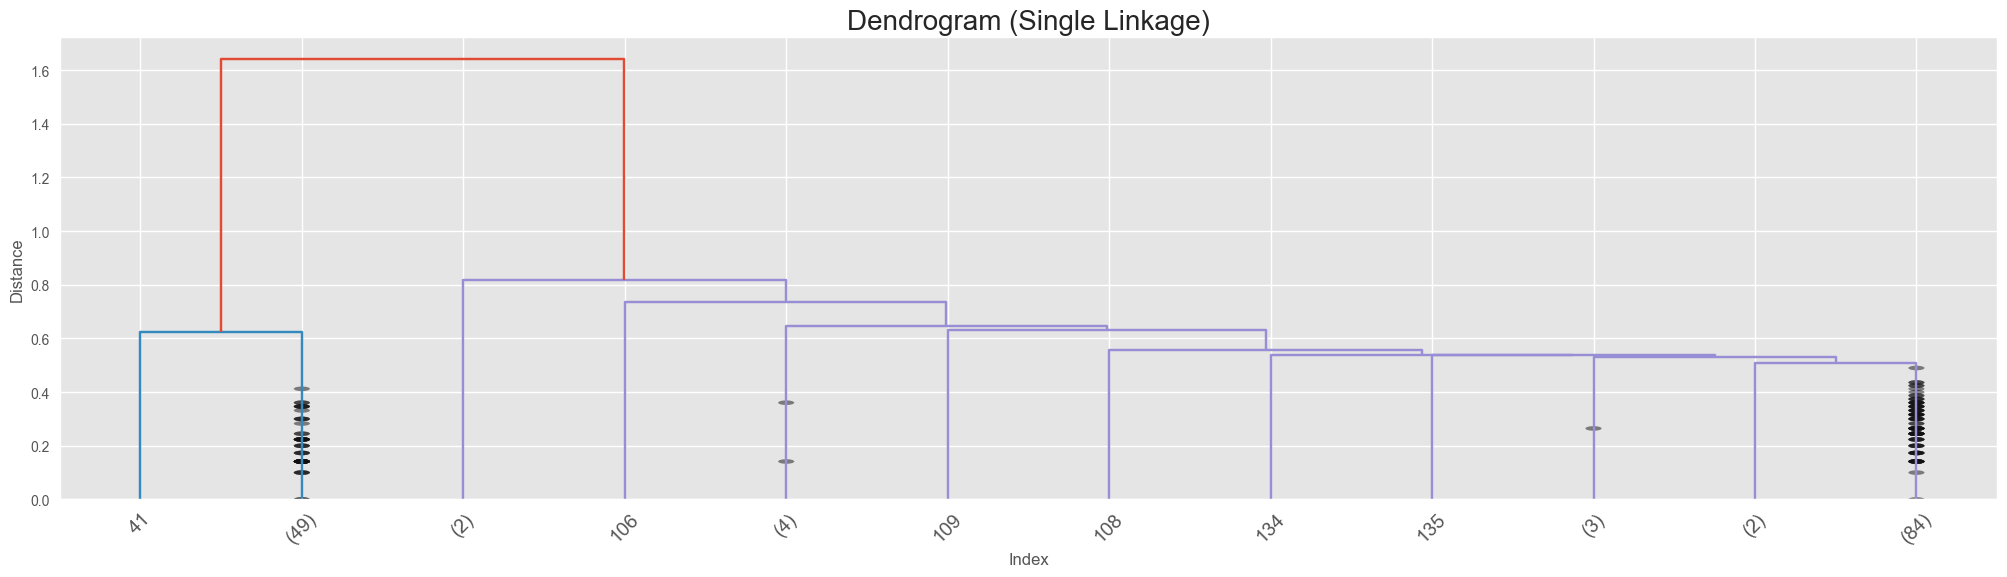

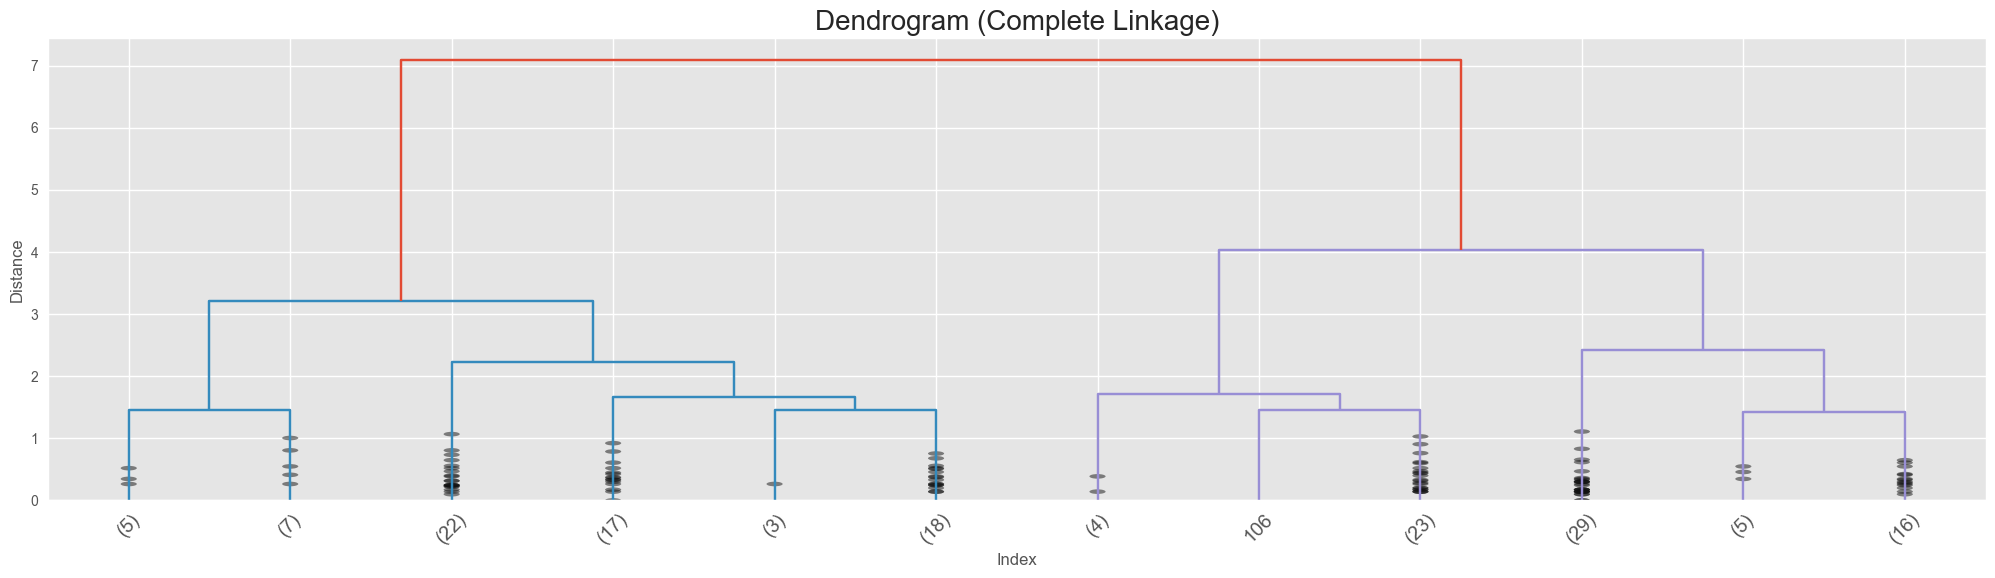

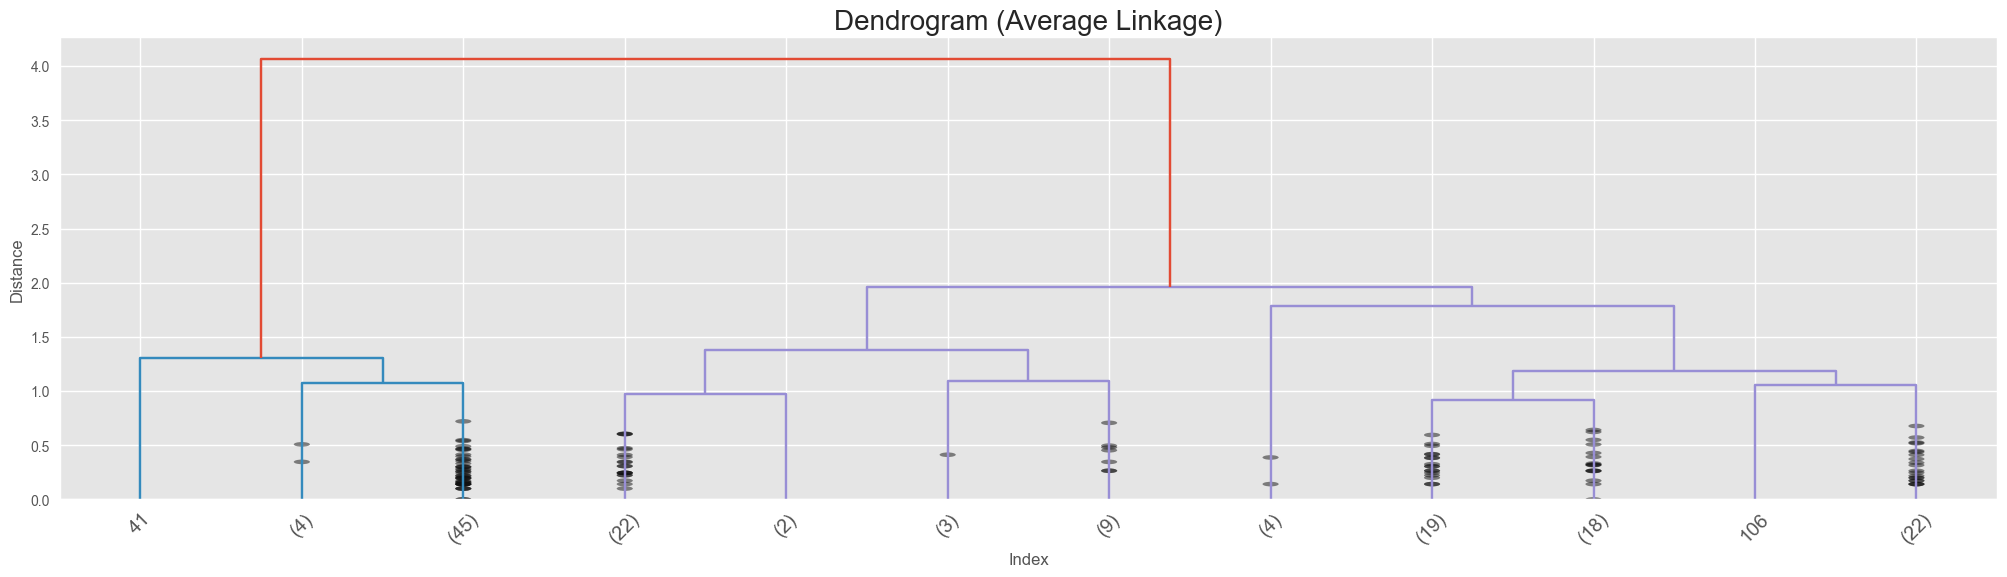

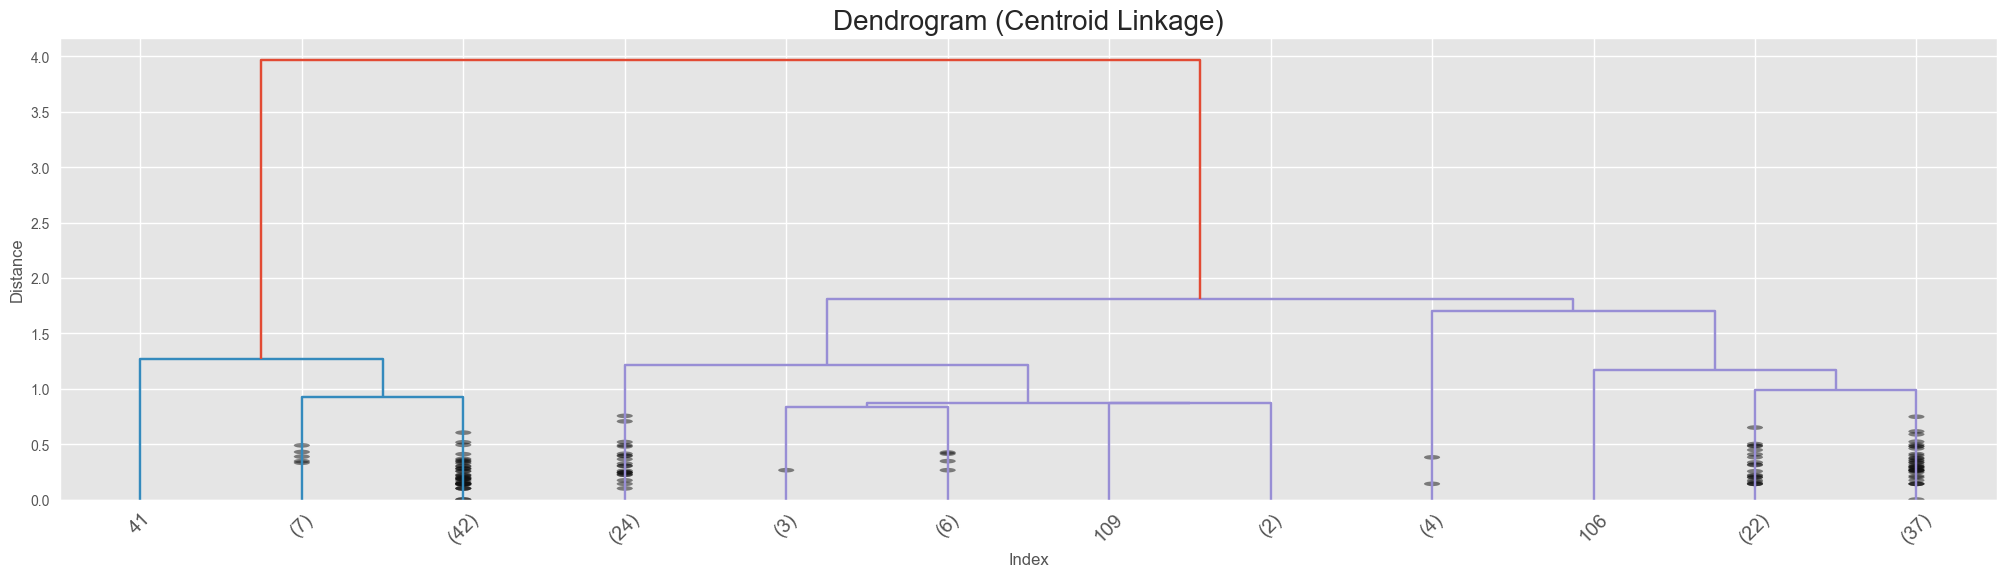

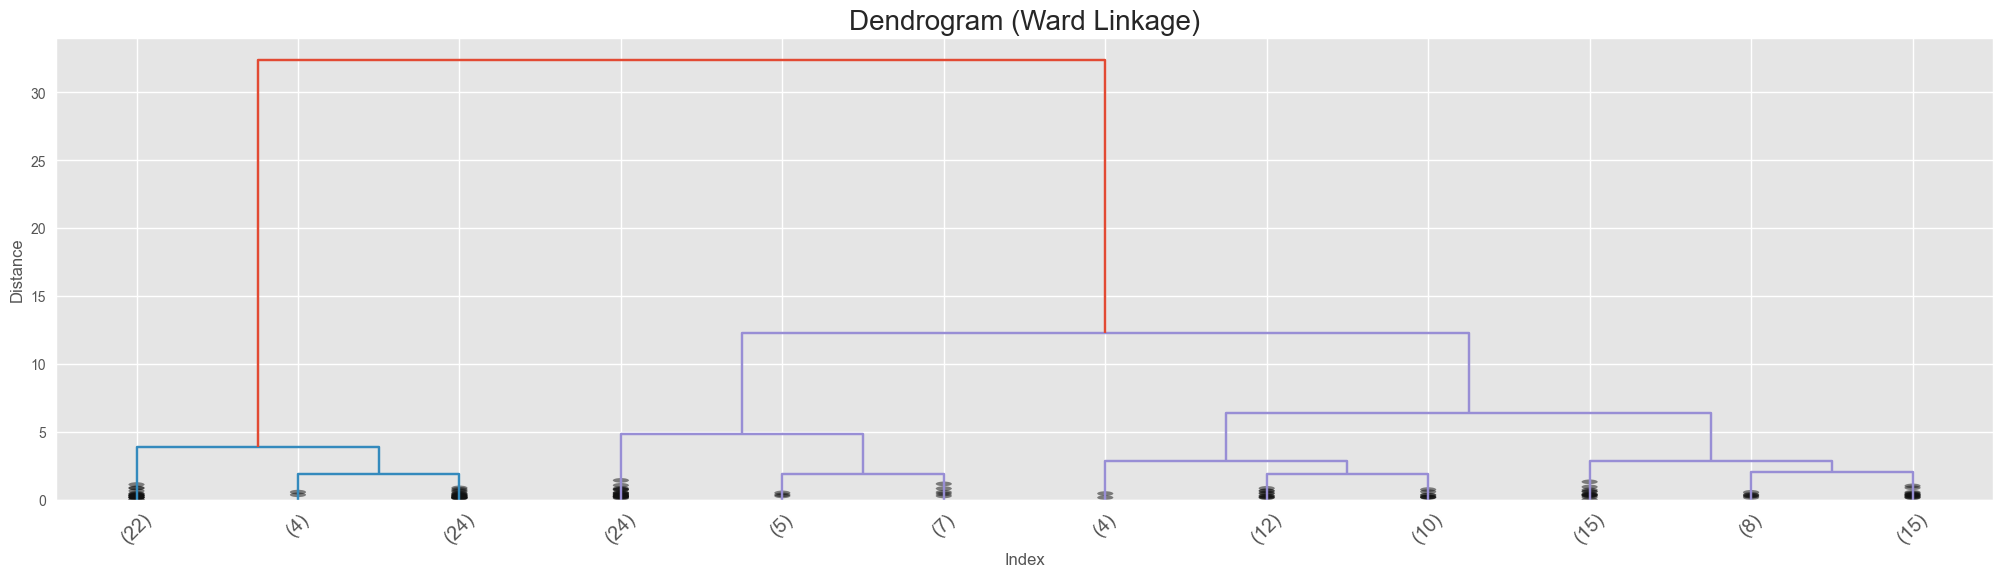

In [6]:
# Perform agglomerative hierarchical clustering for a given linkage method
def perform_clustering(data, linkage_method):
    clustering = linkage(data, method=linkage_method, metric="euclidean")
    # Plot the scatter plot with cluster labels
    return clustering


linkage_methods = ["single", "complete", "average", "centroid", "ward"]
for method in linkage_methods:
    clustering = perform_clustering(X, method)
    # Plot dendrogram
    plt.style.use("ggplot")
    plt.figure(figsize=(25, 6))
    plt.title(f"Dendrogram ({method.capitalize()} Linkage)", fontsize=20)
    plt.xlabel("Index")
    plt.ylabel("Distance")
    dendrogram(
        clustering,
        truncate_mode="lastp",
        p=12,
        leaf_rotation=45,
        leaf_font_size=14,
        show_contracted=True,
    )
    plt.show()

**d)	Calculate the cophenetic correlation for each method and display their values. (10 marks)**

In [16]:
class CopheneticDistanceCalculator:
    def __init__(self, data):
        self.data = data

    def calculate_cophenetic_correlation(self, method):
        # Compute pairwise distances
        distances = pdist(self.data)

        # Perform hierarchical clustering using the specified linkage method
        Z = linkage(self.data, method=method)

        # Calculate cophenetic correlation coefficient
        c, _ = cophenet(Z, distances)

        print("Cophenetic correlation distance for method", method, "is", round(c, 4))

    def calculate_cophenetic_distance_matrix(self, method):
        # Compute pairwise distances
        distances = pdist(self.data)

        # Perform hierarchical clustering using the specified linkage method
        Z = linkage(self.data, method=method)

        # Calculate cophenetic distance matrix
        _, coph_dists = cophenet(Z, distances)

        print("Cophenetic distance matrix for method", method, ":\n")
        print(coph_dists)
        print()


# Create an instance of the CopheneticDistanceCalculator class
calculator = CopheneticDistanceCalculator(X)

# Calculate and print cophenetic correlation distance for each method
for method in linkage_methods:
    calculator.calculate_cophenetic_correlation(method)

Cophenetic correlation distance for method single is 0.8636
Cophenetic correlation distance for method complete is 0.7272
Cophenetic correlation distance for method average is 0.8767
Cophenetic correlation distance for method centroid is 0.8765
Cophenetic correlation distance for method ward is 0.8726


**e)	Display the cophenetic distance for each method. (5 marks)**

In [17]:
# Calculate and print cophenetic distance matrix for each method
for method in linkage_methods:
    calculator.calculate_cophenetic_distance_matrix(method)

Cophenetic distance matrix for method single :

[0.2236068  0.2236068  0.2236068  ... 0.37416574 0.37416574 0.37416574]

Cophenetic distance matrix for method complete :

[0.65574385 1.10905365 1.10905365 ... 1.21243557 2.23606798 2.23606798]

Cophenetic distance matrix for method average :

[0.75518493 0.75518493 0.75518493 ... 0.67479258 1.96361409 1.96361409]

Cophenetic distance matrix for method centroid :

[0.60371183 0.60371183 0.60371183 ... 0.47881025 1.81024315 1.81024315]

Cophenetic distance matrix for method ward :

[ 3.8758436   3.8758436   3.8758436  ...  1.76044502 12.30039605
 12.30039605]

